In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from decimal import Context, ROUND_HALF_UP

In [161]:
def round_half_up(x):
    return float(Decimal(x).to_integral_value(rounding=ROUND_HALF_UP))

## Limited precision addition 

In [167]:
def radd(a, b, n):
    def get_l(z, sz):
        if sz == 0:
            lz =-200
        else:
            lz = np.ceil(np.log10(sz*z*(1+10**(-(n+1)))))
        return lz
    
    def round_fn(z, sz):
        return sz * round_half_up((f * sz * z) / 10 ** lm)
    
    def should_reset(zt):
        return zt != 0 and np.log10(zt) >=n
    
    
    sa = np.sign(a)
    sb = np.sign(b)
    
    
    la = get_l(a, sa)
    lb = get_l(b, sb)
    lm = max(la, lb)
    
    f = 10**n
    
    at = round_fn(a, sa)
    bt = round_fn(b, sb)
    
    ireset = False
    if should_reset(at):
        la += 1
        ireset = True
        
    if should_reset(bt):
        lb +=1
        ireset = True
        
    if ireset:
        lm = max(la, lb)
        at = round_fn(a, sa)
        bt = round_fn(b, sb)
        
    ct = at + bt
    sc = np.sign(ct)
    
    
    if sc != 0:
        if np.log10(sc * ct) >= n:
            ct = round_half_up(ct / 10) * 10
    c = ct * 10**lm / f
    return c
        


## Heron's Device

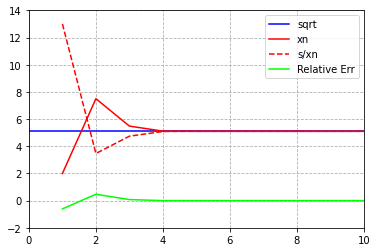

In [176]:
a = 26 # Number for which the sqrt is to be computed
n = 10 # Number of iterations in recursion
g = 2 # Initial guess
dig = 5 # Number of digits
sqrt = np.zeros(n)
sqrt[0] = g

for i in range(1, n):
    sqrt[i] = 0.5 * radd(sqrt[i - 1], a/sqrt[i - 1], dig)

plt.plot(np.arange(n + 1), np.ones(n + 1) * np.sqrt(a), 'b', label='sqrt')
plt.plot(np.arange(1, n + 1), sqrt, 'r', label='xn')
plt.plot(np.arange(1, n + 1), a / sqrt, 'r--', label='s/xn')
plt.plot(np.arange(1, n + 1), (sqrt - np.sqrt(a)) / np.sqrt(a), 'lime', label='Relative Err')
plt.legend();
plt.grid(linestyle='--');
plt.ylim([-2, 14]);
plt.xlim([0, 10]);

## Horner's scheme

In [177]:
def horner_example(z=1):
    a = np.linspace(1, 10, 10)
    n = len(a) - 1
    b = a[0]
    for i in range(n):
        b = a[i + 1] + z * b
    p = b
    return p

def horner_example_radd(z=1, n_radd=5):
    a = np.linspace(1, 10, 10)
    n = len(a) - 1
    b = a[0]
    for i in range(n):
        b = radd(z * b, a[i + 1], n=n_radd)
    p = b
    return p

/var/folders/vx/p2vsss_n7nl9_h99z877fz440000gn/T/ipykernel_52052/2964370914.py:13: RuntimeWarning: invalid value encountered in log10
  return zt != 0 and np.log10(zt) >=n


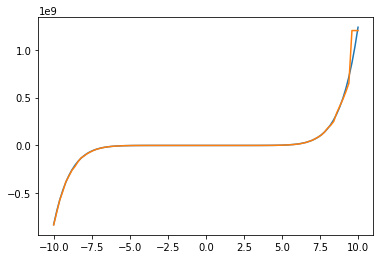

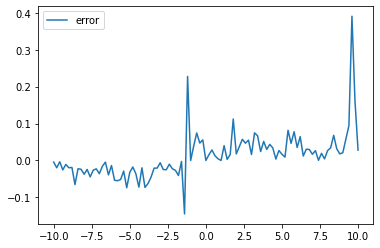

In [209]:
zz = np.linspace(-10, 10, 101)

h1 = np.stack([horner_example(i) for i in zz])
h2 = np.stack([horner_example_radd(i, 2) for i in zz])


plt.plot(zz, h1, label='horner regular');
plt.plot(zz, h2, label='horner radd');
plt.figure();
plt.plot(zz, np.abs(h1 - h2) / h1, label='error');
plt.legend();

## Recursion

/var/folders/vx/p2vsss_n7nl9_h99z877fz440000gn/T/ipykernel_52052/2964370914.py:13: RuntimeWarning: invalid value encountered in log10
  return zt != 0 and np.log10(zt) >=n


,i,delta,Sum,delta(approx),Sum(approx)
0,1.0,0.4634,0.4634,0.5,0.5
1,2.0,0.2432,0.7065,0.2,0.7
2,3.0,0.1226,0.8291,0.1,0.8
3,4.0,0.0614,0.8905,0.1,0.9
4,5.0,0.0306,0.9212,0.0,0.9
5,6.0,0.0153,0.9364,0.0,0.9
6,7.0,0.0076,0.9440,0.0,0.9
7,8.0,0.0037,0.9478,0.0,0.9
8,9.0,0.0018,0.9496,0.0,0.9
9,10.0,0.0009,0.9505,0.0,0.9


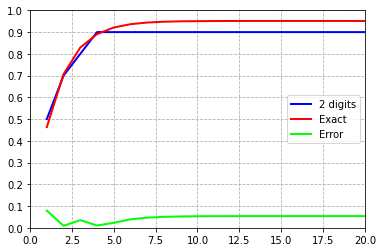

In [289]:
N=20
sum_ = 0
sumr = 0
b = 1
c = 1
x = 0.5
xn = 1
dig = 2
ndiv = 10

a = np.zeros(N)
ar = np.zeros(N)
y = np.zeros(N)
z = np.zeros(N)

for i in range(1, N + 1):
    a1 = np.sin(np.pi / 2 - np.pi / (ndiv * i))
    a2 = -np.cos(np.pi / (ndiv * (i + 1)))
    # Full precision
    xn = xn * x
    addr = xn + b * a1
    addr = c * a2 + addr
    ar[i - 1] = addr
    sumr = sumr + addr
    z[i - 1] = sumr
    # Additions with dig significant figures
    add = radd(xn, b * a1, dig)
    add = radd(add, c * a2, dig)
    # add = radd(b * a1, c * a2, dig)
    # add = radd(add, xn, dig)
    a[i - 1] = add
    sum_ = radd(sum_, add, dig)
    y[i - 1] = sum_
    
res = pd.DataFrame(
    columns = ['i', 'delta', 'Sum', 'delta(approx)', 'Sum(approx)'],
    data = np.stack([np.arange(1, N + 1), ar, z, a, y]).T
)


plt.plot(np.arange(1, N + 1), y, 'b', linewidth=2, label=f'{dig} digits')
plt.plot(np.arange(1, N + 1), z, 'r', linewidth=2, label='Exact')
plt.plot(np.arange(1, N + 1), np.abs(z - y) / z, 'lime', linewidth=2, label='Error')
plt.grid(linestyle='--');
plt.legend();
plt.yticks(np.linspace(0, 1, 11));
plt.ylim([0, 1]);
plt.xlim([0, N]);

res.round(4)


### Reordered

/var/folders/vx/p2vsss_n7nl9_h99z877fz440000gn/T/ipykernel_52052/2964370914.py:13: RuntimeWarning: invalid value encountered in log10
  return zt != 0 and np.log10(zt) >=n


,i,delta,Sum,delta(approx),Sum(approx)
0,1.0,0.4634,0.4634,0.4600,0.46
1,2.0,0.2432,0.7065,0.2500,0.71
2,3.0,0.1226,0.8291,0.1200,0.83
3,4.0,0.0614,0.8905,0.0630,0.89
4,5.0,0.0306,0.9212,0.0310,0.92
5,6.0,0.0153,0.9364,0.0160,0.94
6,7.0,0.0076,0.9440,0.0078,0.95
7,8.0,0.0037,0.9478,0.0039,0.95
8,9.0,0.0018,0.9496,0.0020,0.95
9,10.0,0.0009,0.9505,0.0010,0.95


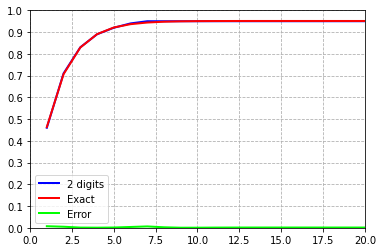

In [290]:
N=20
sum_ = 0
sumr = 0
b = 1
c = 1
x = 0.5
xn = 1
dig = 2
ndiv = 10

a = np.zeros(N)
ar = np.zeros(N)
y = np.zeros(N)
z = np.zeros(N)

for i in range(1, N + 1):
    a1 = np.sin(np.pi / 2 - np.pi / (ndiv * i))
    a2 = -np.cos(np.pi / (ndiv * (i + 1)))
    # Full precision
    xn = xn * x
    addr = xn + b * a1
    addr = c * a2 + addr
    ar[i - 1] = addr
    sumr = sumr + addr
    z[i - 1] = sumr
    # Additions with dig significant figures
    add = radd(b * a1, c * a2, dig)
    add = radd(add, xn, dig)
    a[i - 1] = add
    sum_ = radd(sum_, add, dig)
    y[i - 1] = sum_
    
res = pd.DataFrame(
    columns = ['i', 'delta', 'Sum', 'delta(approx)', 'Sum(approx)'],
    data = np.stack([np.arange(1, N + 1), ar, z, a, y]).T
)


plt.plot(np.arange(1, N + 1), y, 'b', linewidth=2, label=f'{dig} digits')
plt.plot(np.arange(1, N + 1), z, 'r', linewidth=2, label='Exact')
plt.plot(np.arange(1, N + 1), np.abs(z - y) / z, 'lime', linewidth=2, label='Error')
plt.grid(linestyle='--');
plt.legend();
plt.yticks(np.linspace(0, 1, 11));
plt.ylim([0, 1]);
plt.xlim([0, N]);

res.round(4)


## Spherical Bessel Functions

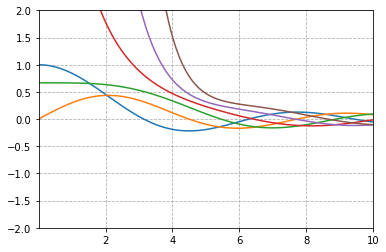

In [238]:
x = np.linspace(0, 10, 101) + 1e-6

j0 = np.sin(x) / x
j1 = j0 / x - np.cos(x) / x

jn_bkwd = [j0, j1]

for n in range(2, 6):
    jn_bkwd.append((2*n + 1) * jn_bkwd[-1] / x - jn_bkwd[-2])

jn_bkwd = np.stack(jn_bkwd)

plt.plot(x, jn_bkwd.T);
plt.ylim([-2, 2]);
plt.xlim(x.min(), x.max())
plt.grid(linestyle='--');

## Euler

In [295]:
from scipy import integrate

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


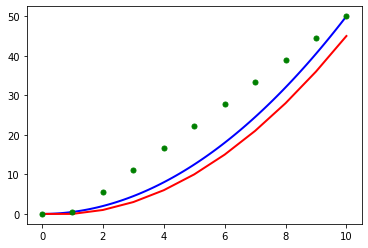

In [325]:
x = np.arange(0, 10.1, 0.1)
y0 = 0
y = 0.5 * x**2 + y0

plt.plot(x, y, 'b', linewidth=2);
# step size
h = 1.0
# Euler's method, forward finite difference
xt = np.arange(0, 10 + h, h)
N = len(xt)
yt = np.zeros(N)
yt[0] = y0
for n in range(1, N):
    yt[n] = yt[n - 1] + h * xt[n - 1]

plt.plot(xt, yt, 'r', linewidth=2)
# Runge Kutta
u0 = np.zeros([2])
result = integrate.solve_ivp(fun=lambda x, y: x,
                             t_span=[xt[0],max(xt)], 
                             y0=[y0], method='RK45')

xrk = result.t
yrk = result.y
yrk = np.array([np.interp(xt, xrk, i) for i in yrk])

plt.plot(xt, yrk[0], '.g', markersize=10);

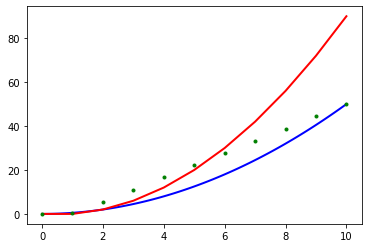

In [327]:
x = np.arange(0, 10.1, 0.1)
y0 = 0
y = 0.5 * x**2 + y0

plt.plot(x, y, 'b', linewidth=2);
# step size
h = 1.0
# Euler's method, central finite difference
xt = np.arange(0, 10 + h, h)
N = len(xt)
yt = np.zeros(N)
yt[0] = y0
for n in range(2, N):
    yt[n] = yt[n - 1] + 2 * h * xt[n - 1]

plt.plot(xt, yt, 'r', linewidth=2)
# Runge Kutta
u0 = np.zeros([2])
result = integrate.solve_ivp(fun=lambda x, y: x,
                             t_span=[xt[0],max(xt)], 
                             y0=[y0], method='RK45')

xrk = result.t
yrk = result.y
yrk = np.array([np.interp(xt, xrk, i) for i in yrk])

plt.plot(xt, yrk[0], '.g');